In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load


import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/netflix-tv-shows-and-movies/credits.csv
/kaggle/input/netflix-tv-shows-and-movies/titles.csv


# **Step 1-Loading data from csv files**

In [2]:
credits = pd.read_csv('/kaggle/input/netflix-tv-shows-and-movies/credits.csv')
titles = pd.read_csv('/kaggle/input/netflix-tv-shows-and-movies/titles.csv')

# **Step 2-Analyzing basic information of data sets**

> **2.1- columns and data type**

In [3]:
credits.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 77801 entries, 0 to 77800
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   person_id  77801 non-null  int64 
 1   id         77801 non-null  object
 2   name       77801 non-null  object
 3   character  68029 non-null  object
 4   role       77801 non-null  object
dtypes: int64(1), object(4)
memory usage: 3.0+ MB


In [4]:
titles.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5850 entries, 0 to 5849
Data columns (total 15 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    5850 non-null   object 
 1   title                 5849 non-null   object 
 2   type                  5850 non-null   object 
 3   description           5832 non-null   object 
 4   release_year          5850 non-null   int64  
 5   age_certification     3231 non-null   object 
 6   runtime               5850 non-null   int64  
 7   genres                5850 non-null   object 
 8   production_countries  5850 non-null   object 
 9   seasons               2106 non-null   float64
 10  imdb_id               5447 non-null   object 
 11  imdb_score            5368 non-null   float64
 12  imdb_votes            5352 non-null   float64
 13  tmdb_popularity       5759 non-null   float64
 14  tmdb_score            5539 non-null   float64
dtypes: float64(5), int64(

> **2.2- sample data**

In [5]:
credits.head()

,person_id,id,name,character,role
0,3748,tm84618,Robert De Niro,Travis Bickle,ACTOR
1,14658,tm84618,Jodie Foster,Iris Steensma,ACTOR
2,7064,tm84618,Albert Brooks,Tom,ACTOR
3,3739,tm84618,Harvey Keitel,Matthew 'Sport' Higgins,ACTOR
4,48933,tm84618,Cybill Shepherd,Betsy,ACTOR


In [6]:
titles.head()

,id,title,type,description,release_year,age_certification,runtime,genres,production_countries,seasons,imdb_id,imdb_score,imdb_votes,tmdb_popularity,tmdb_score
0,ts300399,Five Came Back: The Reference Films,SHOW,This collection includes 12 World War II-era p...,1945,TV-MA,51,['documentation'],['US'],1.0,NaN,NaN,NaN,0.600,NaN
1,tm84618,Taxi Driver,MOVIE,A mentally unstable Vietnam War veteran works ...,1976,R,114,"['drama', 'crime']",['US'],NaN,tt0075314,8.2,808582.0,40.965,8.179
2,tm154986,Deliverance,MOVIE,Intent on seeing the Cahulawassee River before...,1972,R,109,"['drama', 'action', 'thriller', 'european']",['US'],NaN,tt0068473,7.7,107673.0,10.010,7.300
3,tm127384,Monty Python and the Holy Grail,MOVIE,"King Arthur, accompanied by his squire, recrui...",1975,PG,91,"['fantasy', 'action', 'comedy']",['GB'],NaN,tt0071853,8.2,534486.0,15.461,7.811
4,tm120801,The Dirty Dozen,MOVIE,12 American military prisoners in World War II...,1967,NaN,150,"['war', 'action']","['GB', 'US']",NaN,tt0061578,7.7,72662.0,20.398,7.600


> **2.3- Descriptive Analysis of data**

In [7]:
credits.describe()

,person_id
count,7.780100e+04
mean,5.294888e+05
std,6.430167e+05
min,7.000000e+00
25%,4.530600e+04
50%,1.983580e+05
75%,8.880960e+05
max,2.462818e+06


In [8]:
titles.describe()

,release_year,runtime,seasons,imdb_score,imdb_votes,tmdb_popularity,tmdb_score
count,5850.000000,5850.000000,2106.000000,5368.000000,5.352000e+03,5759.000000,5539.000000
mean,2016.417094,76.888889,2.162868,6.510861,2.343938e+04,22.637925,6.829175
std,6.937726,39.002509,2.689041,1.163826,9.582047e+04,81.680263,1.170391
min,1945.000000,0.000000,1.000000,1.500000,5.000000e+00,0.009442,0.500000
25%,2016.000000,44.000000,1.000000,5.800000,5.167500e+02,2.728500,6.100000
50%,2018.000000,83.000000,1.000000,6.600000,2.233500e+03,6.821000,6.900000
75%,2020.000000,104.000000,2.000000,7.300000,9.494000e+03,16.590000,7.537500
max,2022.000000,240.000000,42.000000,9.600000,2.294231e+06,2274.044000,10.000000


> **2.4- Analyzing unique and null values**

In [9]:
print("Shape of the dataset credits: ",credits.shape)
print("Null values in credits: ")
print(credits.isnull().sum())
print("Number of unique values: ")
print(credits.nunique())

Shape of the dataset credits:  (77801, 5)
Null values in credits: 
person_id       0
id              0
name            0
character    9772
role            0
dtype: int64
Number of unique values: 
person_id    54589
id            5489
name         54314
character    47274
role             2
dtype: int64


In [10]:
print("Shape of the dataset titles: ",titles.shape)
print("Null values in titles: ")
print(titles.isnull().sum())
print("Number of unique values: ")
print(titles.nunique())

Shape of the dataset titles:  (5850, 15)
Null values in titles: 
id                         0
title                      1
type                       0
description               18
release_year               0
age_certification       2619
runtime                    0
genres                     0
production_countries       0
seasons                 3744
imdb_id                  403
imdb_score               482
imdb_votes               498
tmdb_popularity           91
tmdb_score               311
dtype: int64
Number of unique values: 
id                      5850
title                   5798
type                       2
description             5829
release_year              63
age_certification         11
runtime                  202
genres                  1726
production_countries     452
seasons                   26
imdb_id                 5447
imdb_score                80
imdb_votes              3880
tmdb_popularity         4889
tmdb_score               394
dtype: int64


> **2.5- Replacing null values in titles**

In [11]:
titles['imdb_score'] = titles['imdb_score'].fillna(0)
titles['title'] = titles['title'].replace(np.nan, 'data unavailable')

# **Step 3- Data Visualization**

> **Analysis 1- Highest IMDB rated movie by year for last 10 years**

Text(0.5, 1.0, 'Last 10 years highest IMDB rated movies')

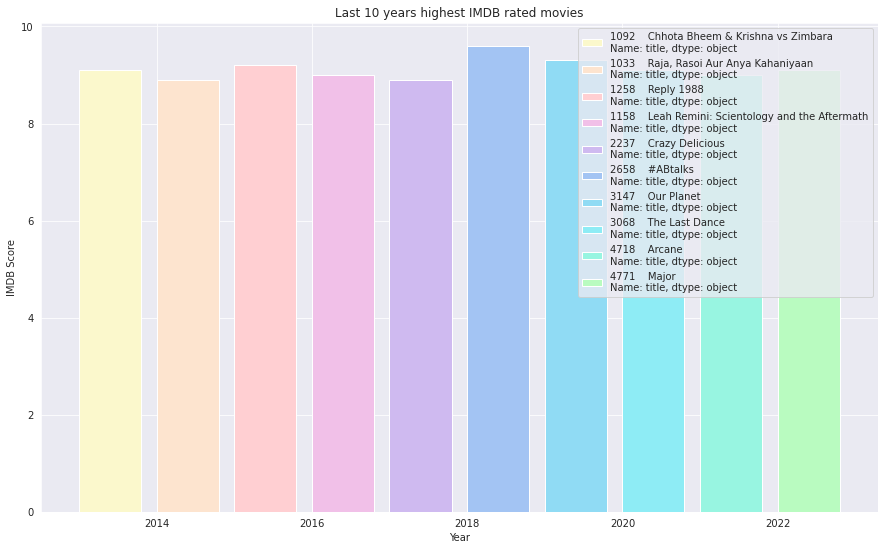

In [12]:
#libraries to plot graphs
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

plt.figure(figsize=(15, 9))

#send dark style
sns.set_style("darkgrid")

#taking out maximum imdb rating per year
titles_groupby_year_maxscore=titles.loc[titles.groupby("release_year")["imdb_score"].idxmax()]

#list of colors to be used in bar graph
c = ['#FBF8CC', '#FDE4CF', '#FFCFD2', '#F1C0E8', '#CFBAF0','#A3C4F3','#90DBF4','#8EECF5','#98F5E1','#B9FBC0']

#plotting the graph
year = 2013
for i in range(len(c)):
    plt.bar(titles_groupby_year_maxscore.release_year[titles_groupby_year_maxscore.release_year==year+i],
            titles_groupby_year_maxscore.imdb_score[titles_groupby_year_maxscore.release_year==year+i],
            color = c[i],label=titles_groupby_year_maxscore.title[titles_groupby_year_maxscore.release_year==year+i],
            align='edge')
plt.legend()
plt.xlabel('Year')
plt.ylabel('IMDB Score')
plt.title("Last 10 years highest IMDB rated movies")

> **Analysis 2- Percentage distribution by Genre for all years**

Text(0.5, 1.0, 'Percentage distribution by genres')

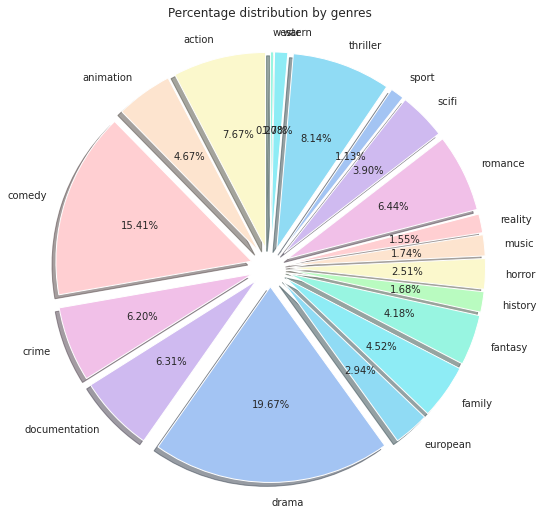

In [13]:
from ast import literal_eval


plt.figure(figsize=(15, 9))

#send dark style
sns.set_style("darkgrid")

#explode the columns for genres
list_of_genres = titles.copy()
list_of_genres['genres'] = list_of_genres['genres'].apply(literal_eval) #convert to list type
list_of_genres=list_of_genres.explode('genres')

#group by genre
groupby_genres=list_of_genres.groupby("genres").count().reset_index()

y = []
for i in groupby_genres:
    y.append(groupby_genres['id'])
mylabels = groupby_genres['genres']
y = y[0]
plt.pie(y, labels = mylabels, startangle = 90,colors = c,shadow=True,explode=[0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1],autopct='%1.2f%%')

plt.title("Percentage distribution by genres")
#plt.show() 

In [14]:
plt.figure(figsize=(15, 9))

#send dark style
sns.set_style("darkgrid")

country_movies = titles.copy()
country_movies['production_countries'] = country_movies['production_countries'].apply(literal_eval) #convert to list type
country_movies=country_movies.explode('production_countries')

#taking out maximum movie count for each country
titles_groupby_country=country_movies.groupby("production_countries").count().reset_index()
titles_groupby_country
#plotting the graph
# year = 2013
# for i in range(len(c)):
#     plt.bar(titles_groupby_year_maxscore.release_year[titles_groupby_year_maxscore.release_year==year+i],
#             titles_groupby_year_maxscore.imdb_score[titles_groupby_year_maxscore.release_year==year+i],
#             color = c[i],label=titles_groupby_year_maxscore.title[titles_groupby_year_maxscore.release_year==year+i],
#             align='edge')
# plt.legend()
# plt.xlabel('Year')
# plt.ylabel('IMDB Score')
# plt.title("Last 10 years highest IMDB rated movies")

,production_countries,id,title,type,description,release_year,age_certification,runtime,genres,seasons,imdb_id,imdb_score,imdb_votes,tmdb_popularity,tmdb_score
0,AE,21,21,21,21,21,12,21,21,2,19,21,19,19,15
1,AF,2,2,2,2,2,0,2,2,0,1,2,0,2,2
2,AL,2,2,2,2,2,1,2,2,0,2,2,2,2,2
3,AO,1,1,1,1,1,0,1,1,0,1,1,1,1,1
4,AR,72,72,72,72,72,22,72,72,18,67,72,67,72,69
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
104,VE,1,1,1,1,1,0,1,1,0,1,1,1,1,1
105,VN,3,3,3,3,3,0,3,3,0,2,3,2,3,3
106,XX,23,23,23,23,23,8,23,23,2,21,23,21,21,16
107,ZA,48,48,48,48,48,22,48,48,11,45,48,44,47,40


<Figure size 1080x648 with 0 Axes>

> **Rough**

In [15]:
#plt.bar(titles_groupby_year_maxscore.release_year[titles_groupby_year_maxscore.release_year>2012],
#       titles_groupby_year_maxscore.imdb_score[titles_groupby_year_maxscore.release_year>2012],
#      color=c)

#movies_color = titles_groupby_year_maxscore.title
#plt.legend(titles_groupby_year_maxscore.title, title='Movie names')

#titles_groupby_year = titles.groupby('release_year').max()
#titles_groupby_year = titles.groupby('release_year')

#year = titles_groupby_year[titles_groupby_year.index>2000].index.tolist() 
#highest_imdb = titles_groupby_year['imdb_score'].max().reset_index('id')
#highest_imdb = titles_groupby_year[titles_groupby_year.index>2000].imdb_score.tolist() 
#highest_imdb
#movie_name = titles_groupby_year[titles_groupby_year.index>2000].title.tolist()
#titles_groupby_year = titles.groupby('release_year').max()
#titles_groupby_year
